# **AIN 214 - PA2 - FALL 2024**


BELOW MD CELLS CONTAIN THE QUESTIONS YOU ARE ASKED TO IMPLEMENT WITHIN THE CONTEXT OF THIS HW. PLEASE FILL IN THE CELLS FOR THE ANSWERS RIGHT BELOW THE MD CELL OF THE QUESTION. YOU CAN ADD AS MANY CELLS AS YOU WANT, BE IT CODE OR MD, SO LONG AS YOU PROVIDE UNDERSTANDABLE AND TRACEABLE REPORTING. PLEASE ADD COMMENTS ON YOUR CODES. ALSO, FILL IN MD CELLS WHERE YOU ARE ASKED TO COMMENT ON YOUR RESULTS OR EXPLAIN YOUR REASONING. ALSO, PLEASE DO NOT HESITATE TO USE THEM FOR YOUR OWN REPORTING PURPOSES. PLEASE KEEP IN MIND THAT, REPORTING IS A KEY STEP IN DATA SCIENCE.

**Deadline: 08.11.2024 (23:59:59)**

**Submission:** Submit your Jupyter Notebooks via https://submit.cs.hacettepe.edu.tr/

<font color='red'> **!!! PLEASE RUN YOUR CODE.   THE OUTPUT OF YOUR CODE MUST BE VISIBLE. DO NOT DELETE OR HIDE THE OUTPUT.**</font>

# **Necessary Imports**

In [97]:
# Import required libraries
import pandas as pd
import sqlite3 as db
import matplotlib.pyplot as plt

# **PART- 1**

**Set of Questions on Healthcare Management System (60 Pts)**



For this part, you will use a dataset related to a Healthcare Management System. The dataset includes information about patients, doctors, medical procedures, and healthcare operations.



* **Patients**: There are many patients within the healthcare system. The system holds details that help identify the patient, such as the name and email of the patient receiving medical care.

* **Doctors**: Profiles of healthcare professionals within the facility are stored. Each record provides information about the doctor's identity, including name, specialty and contact information, which is crucial for directing patients to appropriate medical services and ensuring effective communication.

* **Appointments**: Tracks all scheduled visits between patients and doctors and serves as a vital component of the health management system. It keeps records of the appointment date and time, the patient and doctor involved and plays a critical role in managing patient flow and optimizing the use of healthcare resources.

* **Medical Procedures**: It is necessary to catalog the various treatments and diagnostic services offered by the healthcare facility. It is essential to provide clarity on the types of medical interventions available, which aids both clinical and financial planning.

* **Billing**: It is important to record all financial transactions related to patient appointments and procedures. It keeps track of the items billed to patients along with their respective amounts, which is crucial for the financial health of the health facility, allowing for accurate monitoring of income and outstanding balances.


This dataset will be used to design a relational database for managing healthcare operations, which includes data about patients, doctors, appointments, and more. Your task is to build an efficient database schema and write SQL queries.

---


**Dataset Path:** "Data/Appointments_procedures.csv, Patient_billing.csv , Doctors.csv"
  
---

**Note:** Use sqite3 python package for DB

---

# **Q1**. Design your schema as tables. Draw the necessary tables with the appropriate attributes. State the primary keys, foreign keys (and their references). Create the tables in your schema in the database. (10 Points)

There is no single soluion here, come up with your own design.

***Patients Table***:

| Column     | Type    | Key      | Description                                   |
|------------|---------|----------|-----------------------------------------------|
| PatientID  | INTEGER | PK       | Unique identifier for patients                |
| FirstName  | TEXT    |          | Patient's first name                          |
| LastName   | TEXT    |          | Patient's last name                           |
| Email      | TEXT    |          | Patient's email address                       |

<br>

---
---
<br>

***Invoices Table***:

| Column     | Type    | Key      | Description                                   |
|------------|---------|----------|-----------------------------------------------|
| InvoiceID  | TEXT    | PK       | Unique identifier for invoices                |
| PatientID  | INTEGER | FK       | Identifier for the patient associated with the invoice |
| Items      | TEXT    |          | List of items on the invoice                  |
| Amount     | INTEGER |          | Total amount of the invoice                   |
| FOREIGN KEY (PatientID) REFERENCES Patients(PatientID) |    |          |      |

<br>

---
---
<br>

***Doctors Table***:

| Column        | Type    | Key      | Description                                   |
|---------------|---------|----------|-----------------------------------------------|
| DoctorID      | INTEGER | PK       | Unique identifier for doctors                 |
| DoctorName    | TEXT    |          | Doctor's name                                 |
| Specialization | TEXT   |          | Doctor's area of specialization               |
| DoctorContact  | TEXT   |          | Doctor's contact information                  |

<br>

---
---
<br>



***Appointments Table***:

| Column        | Type    | Key      | Description                                   |
|---------------|---------|----------|-----------------------------------------------|
| AppointmentID | INTEGER | PK       | Unique identifier for each appointment        |
| Date          | TEXT    |          | Date of the appointment                       |
| Time          | TEXT    |          | Time of the appointment                       |
| PatientID     | INTEGER | FK       | Reference to the patient associated with the appointment |
| DoctorID      | INTEGER | FK       | Reference to the doctor associated with the appointment |
| ProcedureID   | INTEGER | FK       | Reference to the procedure for the appointment |
| FOREIGN KEY (PatientID) REFERENCES Patients(PatientID) |
| FOREIGN KEY (DoctorID) REFERENCES Doctors(DoctorID) |
| FOREIGN KEY (ProcedureID) REFERENCES Procedures(ProcedureID) |

<br>

---
---
<br>

***Procedures Table***:

| Column        | Type    | Key  | Description                                   |
|---------------|---------|------|-----------------------------------------------|
| ProcedureID   | INTEGER | PK   | Unique identifier for each procedure          |
| ProcedureName | TEXT    |      | Name of the medical procedure 


In [98]:
#Read the csv files
patient_billing = pd.read_csv('Data/patient_billing.csv')
appointments_procedures = pd.read_csv('Data/Appointments_procedures.csv')
doctors = pd.read_csv('Data/Doctors.csv')

patients = patient_billing.loc[:, ["PatientID", "firstname", "lastname", "email"]]
patients.drop_duplicates(inplace=True)  #Drop same patient lines
patients.rename(columns={
    "firstname": "FirstName",
    "lastname": "LastName",
    "email": "Email"
}, inplace=True)
patients['PatientID'].is_unique  #Patient IDs' are unique, so we don't need to generate new ID column.

True

In [99]:
invoices = patient_billing.loc[:, ["PatientID", "InvoiceID", "Items", "Amount"]]
invoices.drop_duplicates(inplace=True)  #Drop same invoice lines
invoices["InvoiceID"].is_unique  #Invoice IDs' are unique, so we don't need to generate new ID column.

True

In [100]:
procedures = appointments_procedures.loc[:, ["ProcedureID", "ProcedureName"]]
procedures.drop_duplicates(inplace=True)

appointments = appointments_procedures.loc[:, ["AppointmentID", "Date", "Time", "PatientID", "DoctorID", "ProcedureID"]]
appointments.drop_duplicates(inplace=True)

In [101]:
db_conn = db.connect('HealthcareManagementSystem.db')  #Create database
db_cursor = db_conn.cursor()

#To make code re-executable
db_cursor.execute("DROP TABLE IF EXISTS Patients")
db_cursor.execute("DROP TABLE IF EXISTS Invoices")
db_cursor.execute("DROP TABLE IF EXISTS Doctors")
db_cursor.execute("DROP TABLE IF EXISTS Appointments")
db_cursor.execute("DROP TABLE IF EXISTS Procedures")

db_cursor.execute("""
    CREATE TABLE IF NOT EXISTS Patients(
        PatientID INTEGER PRIMARY KEY,
        FirstName TEXT,
        LastName TEXT,
        Email TEXT
    )""")

db_cursor.execute("""
    CREATE TABLE IF NOT EXISTS Invoices(
        InvoiceID TEXT PRIMARY KEY,
        PatientID INTEGER,
        Items TEXT,
        Amount INTEGER,
        FOREIGN KEY(PatientID) REFERENCES Patients(PatientID)
    )""")

db_cursor.execute("""
    CREATE TABLE IF NOT EXISTS Doctors(
        DoctorID INTEGER PRIMARY KEY,
        DoctorName TEXT,
        Specialization TEXT,
        DoctorContact TEXT
    )""")

db_cursor.execute("""
    CREATE TABLE IF NOT EXISTS Appointments(
        AppointmentID INTEGER,
        Date TEXT,
        Time TEXT,
        PatientID INTEGER,
        DoctorID INTEGER,
        ProcedureID INTEGER,
        FOREIGN KEY(PatientID) REFERENCES Patients(PatientID),
        FOREIGN KEY(DoctorID) REFERENCES Doctors(DoctorID),
        FOREIGN KEY(ProcedureID) REFERENCES Appointments(ProcedureID)
    )""")

db_cursor.execute("""
    CREATE TABLE IF NOT EXISTS Procedures(
        ProcedureID INTEGER PRIMARY KEY,
        ProcedureName TEXT
    )""")

#Transfer the data into database
doctors.to_sql(con=db_conn, if_exists="append", index=False, name="Doctors")
patients.to_sql(con=db_conn, if_exists="append", index=False, name="Patients")
invoices.to_sql(con=db_conn, if_exists="append", index=False, name="Invoices")
appointments.to_sql(con=db_conn, if_exists="append", index=False, name="Appointments")
procedures.to_sql(con=db_conn, if_exists="append", index=False, name="Procedures")

db_cursor.close()
db_conn.close()

# **Q2**.  Write a SQL query that retrieves the top 5 doctors based on the total number of appointments they have conducted. The results should include each doctor's doctor_id, doctor_name, and the corresponding total_appointments they have handled.(10 Points)

In [102]:
db_conn = db.connect('HealthcareManagementSystem.db')
db_cursor = db_conn.cursor()

"""I used DISTINCT AppointmentID since there are some rows with same AppointmentID, 
and their date and time are exactly same. They just have different procedures in one appointment."""

query = pd.read_sql_query("""
SELECT d.DoctorID, d.DoctorName, COUNT(DISTINCT a.AppointmentID) AS AppointmentCount
FROM Appointments a
JOIN Doctors d ON a.DoctorID = d.DoctorID
GROUP BY  d.DoctorID
ORDER BY AppointmentCount DESC
LIMIT 5
""", con=db_conn)

db_cursor.close()
db_conn.close()
query

DoctorID DoctorName  AppointmentCount
0       820   Christal                 3
1       800   Hermione                 3
2       637    Lorenza                 3
3       542     Sandie                 3
4       527  Cristabel                 3

# **Q3**.  Calculates the total billing amount for each patient. The output should present each patient's patient_id, first_name, last_name, and the total_billed_amount. List the amount of the bill in descending order.(10 Points)

In [103]:
db_conn = db.connect('HealthcareManagementSystem.db')
db_cursor = db_conn.cursor()

query = pd.read_sql_query("""
SELECT i.PatientID, p.FirstName, p.LastName, SUM(i.Amount) AS TotalBilledAmount
FROM Invoices i
JOIN Patients p ON i.PatientID = p.PatientID
GROUP BY p.PatientID
ORDER BY TotalBilledAmount DESC
""", con=db_conn)

db_cursor.close()
db_conn.close()
query

PatientID  FirstName LastName  TotalBilledAmount
0          733      Lesly   Arquit            4035149
1          368  Stephanie     Agle            3436703
2          779      Candi   Shaver            3283643
3          240   Margette  Belldas            2800003
4          242     Frieda  Bonilla            2286000
..         ...        ...      ...                ...
404        509    Frances   Lipson              21661
405        298      Chere      Dom              20564
406        921  Gavrielle   Kellby              16767
407        827     Mureil   Oriana              16567
408        403     Ericka  Ortrude              15151

[409 rows x 4 columns]

# **Q4**. Write a SQL query to find the most common medical procedures for every doctor. The result should include the doctor_id, doctor_name, procedure_name, and the count of how many times each procedure has been performed (procedure_count). (10 Points)

In [104]:
db_conn = db.connect('HealthcareManagementSystem.db')
db_cursor = db_conn.cursor()

"""From inner query to outer; for corresponding doctor count all types of procedure, then get max,
last select procedure which is most common."""

query = pd.read_sql_query("""
SELECT d.DoctorID, d.DoctorName, p.ProcedureName, COUNT(p.ProcedureName) AS ProcedureCount
FROM Appointments a
JOIN Doctors d ON d.DoctorID = a.DoctorID
JOIN Procedures p ON p.ProcedureID = a.ProcedureID
GROUP BY a.DoctorID, p.ProcedureName
HAVING ProcedureCount = (
    SELECT MAX(SubQuery.ProcedureCount)
    FROM (
        SELECT COUNT(*) AS ProcedureCount
        FROM Appointments a1
        JOIN Procedures p1 ON p1.ProcedureID = a1.ProcedureID
        WHERE a1.DoctorID = a.DoctorID
        GROUP BY a1.DoctorID, p1.ProcedureName
    ) AS SubQuery
)
ORDER BY ProcedureCount DESC
""", con=db_conn)

db_cursor.close()
db_conn.close()
query

DoctorID DoctorName                            ProcedureName  \
0         417      Molli                             Liver biopsy   
1         439     Noelle              X-rays, CT scans, MRI scans   
2         637    Lorenza      Interventional radiology procedures   
3         688  Constance                        Surgical oncology   
4         925  Hyacinthe                 General health check-ups   
..        ...        ...                                      ...   
270       984      Dacia            Immunotherapy (allergy shots)   
271       993      Sadie  Epidural anesthesia for pain management   
272       997   Georgina              Hormone replacement therapy   
273       997   Georgina                Intensive care management   
274       999      Wynne                        Radiation therapy   

     ProcedureCount  
0                 2  
1                 2  
2                 2  
3                 2  
4                 2  
..              ...  
270               1  
271               1  
272               1  
273               1  
274               1  

[275 rows x 4 columns]

# **Q5**. Calculate the total revenue generated by each doctor from the procedures they have performed. The output should display the doctor_id, first_name and the total revenue (total_revenue) attributed to each doctor. (10 Points)

In [105]:
db_conn = db.connect('HealthcareManagementSystem.db')
db_cursor = db_conn.cursor()

query = pd.read_sql_query("""
SELECT a.DoctorID,  d.DoctorName, SUM(i.Amount) AS TotalRevenue
FROM Appointments a
JOIN Invoices i ON a.PatientID = i.PatientID 
JOIN Doctors d ON d.DoctorID = a.DoctorID
GROUP BY a.DoctorID

""", con=db_conn)

db_cursor.close()
db_conn.close()
query

DoctorID DoctorName  TotalRevenue
0        101  Mireielle        545986
1        117     Karena       1118905
2        120     Lilith        144746
3        129    Aurelie       2286000
4        155     Alleen        114657
..       ...        ...           ...
86       957      Sissy        174034
87       959     Sharai        608597
88       965      Flory       1212292
89       971      Moyna        450981
90       975     Hettie       4347878

[91 rows x 3 columns]

# **Q6.** Identify patients who have had multiple appointments. The query should return the patient_id, first_name, last_name, and appointment_count. List the appointment_count in descending order. (10 Points)

In [106]:
db_conn = db.connect('HealthcareManagementSystem.db')
db_cursor = db_conn.cursor()

"""I used DISTINCT AppointmentID since there are some rows with same AppointmentID, 
and their date and time are exactly same. They just have different procedures in one appointment."""

query = pd.read_sql("""
SELECT p.PatientID, p.FirstName, p.LastName, COUNT(DISTINCT a.AppointmentID) AS AppointmentCount
FROM Appointments a
JOIN Patients p ON p.PatientID = a.PatientID
GROUP BY p.PatientID
HAVING AppointmentCount >1
ORDER BY AppointmentCount DESC 
""", db_conn)

db_cursor.close()
db_conn.close()
query

PatientID   FirstName    LastName  AppointmentCount
0         368   Stephanie        Agle                 4
1         717       Tybie      Latini                 3
2         977      Carree        Bach                 2
3         961       Ruthe       Garbe                 2
4         934         Sam      Cookie                 2
5         917   Harrietta      Maisey                 2
6         870    Carolina       Carbo                 2
7         817       Trixi     Skurnik                 2
8         747        Lila         Rhu                 2
9         696       Grier        Noam                 2
10        621       Tarra    Bouchard                 2
11        613         Zia  Wildermuth                 2
12        494      Maisey        Pyle                 2
13        411     Gaylene   Robertson                 2
14        381     Chickie     Hazlett                 2
15        339   Mellicent      Viddah                 2
16        281  Marguerite      Silvan                 2
17        249      Nicoli        Doig                 2
18        242      Frieda     Bonilla                 2
19        190       Amara    Sawtelle                 2
20        149      Drucie      Nedrud                 2
21        142      Aurore    Garrison                 2

# **PART- 2**

**Set of Questions : DATA ANALYSIS WITH VISUALIZATION TOOLS** **(40 Pts)**

Answer the following questions, using visualization tools, and comment on your work.

---

**Dataset Path**: "Data/Suicides.csv"

---



# **Q1.** Create a pivot table showing the average suicide rate by country and year.  Which countries have the highest and lowest average suicide rates over the years? Analyze the data using this graph.(8 Points)

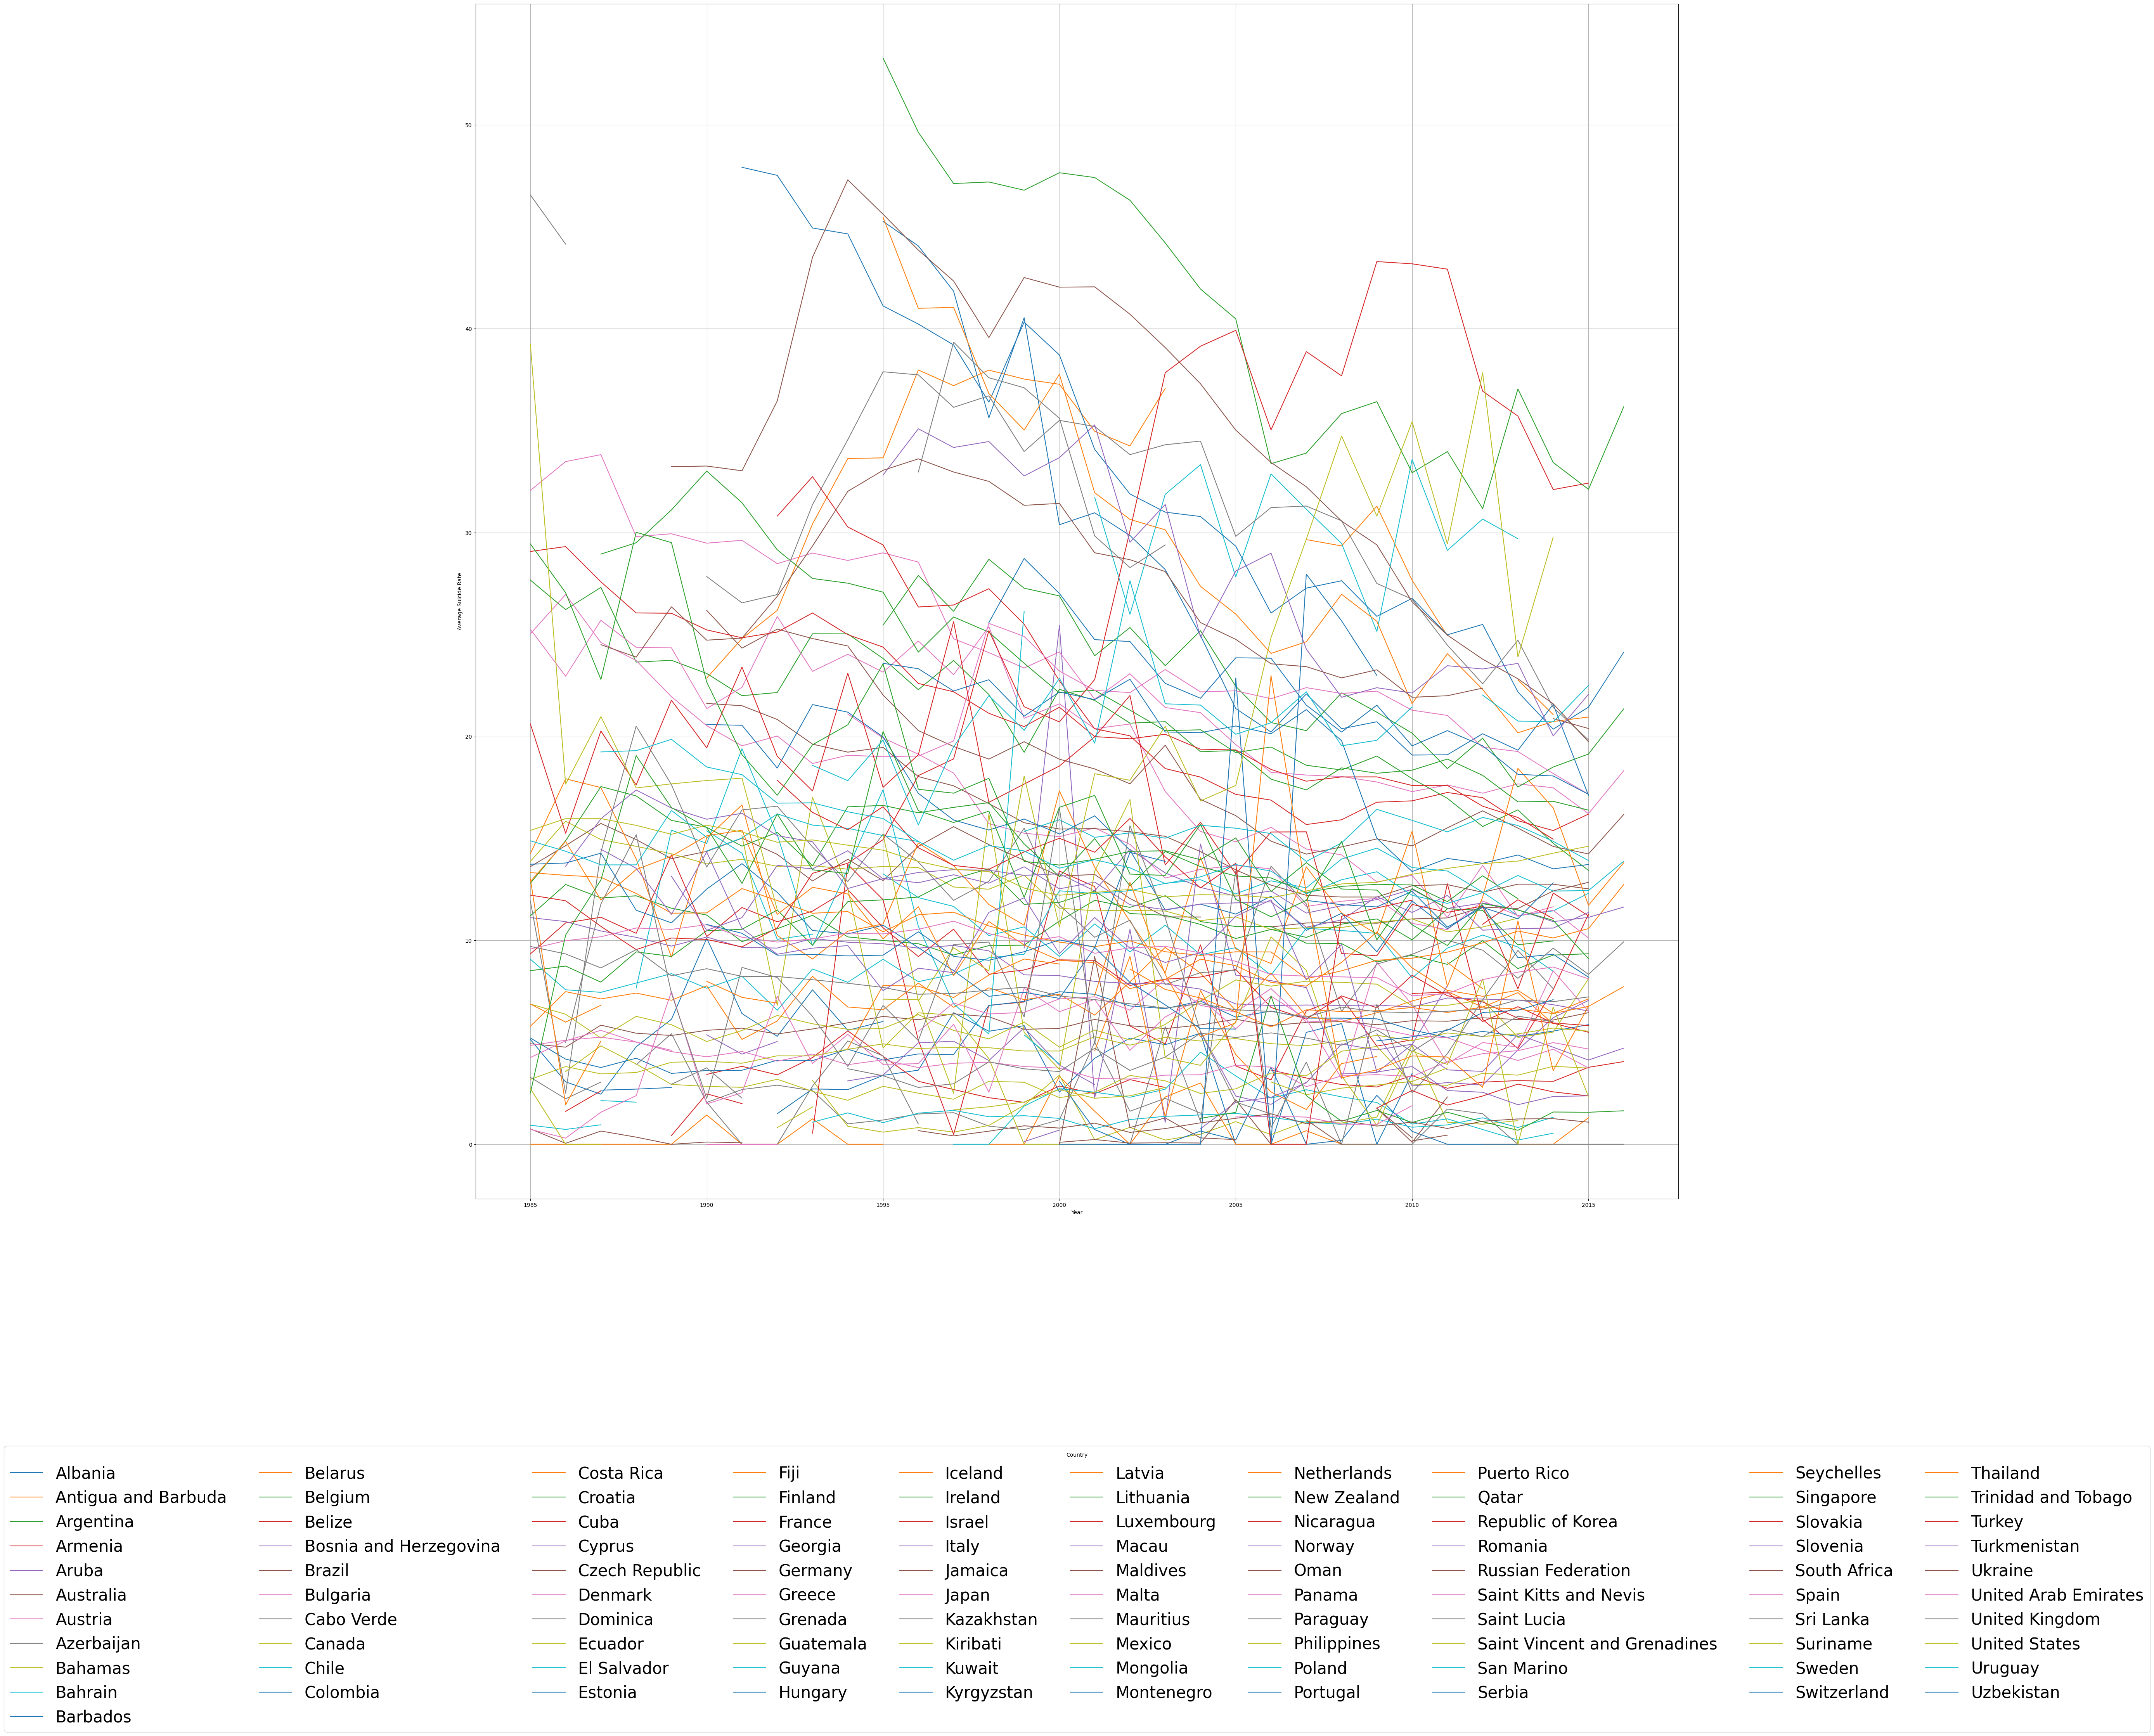

In [107]:
suicides = pd.read_csv("Data/Suicides.csv")

df = suicides.groupby(["country", "year"])["suicides/100k pop"].mean().reset_index()
pivot = df.pivot(index="country", columns="year", values="suicides/100k pop")
plt.figure(figsize=(40, 40))
pivot.T.plot(ax=plt.gca())
plt.xlabel("Year")
plt.ylabel("Average Suicide Rate")
plt.legend(title="Country", bbox_to_anchor=(0.5, -0.2), loc="upper center", ncol=10, fontsize=30)
plt.grid()

"""
When we want to see all countries, figure gets too complicated to see and understand.
"""
plt.show()

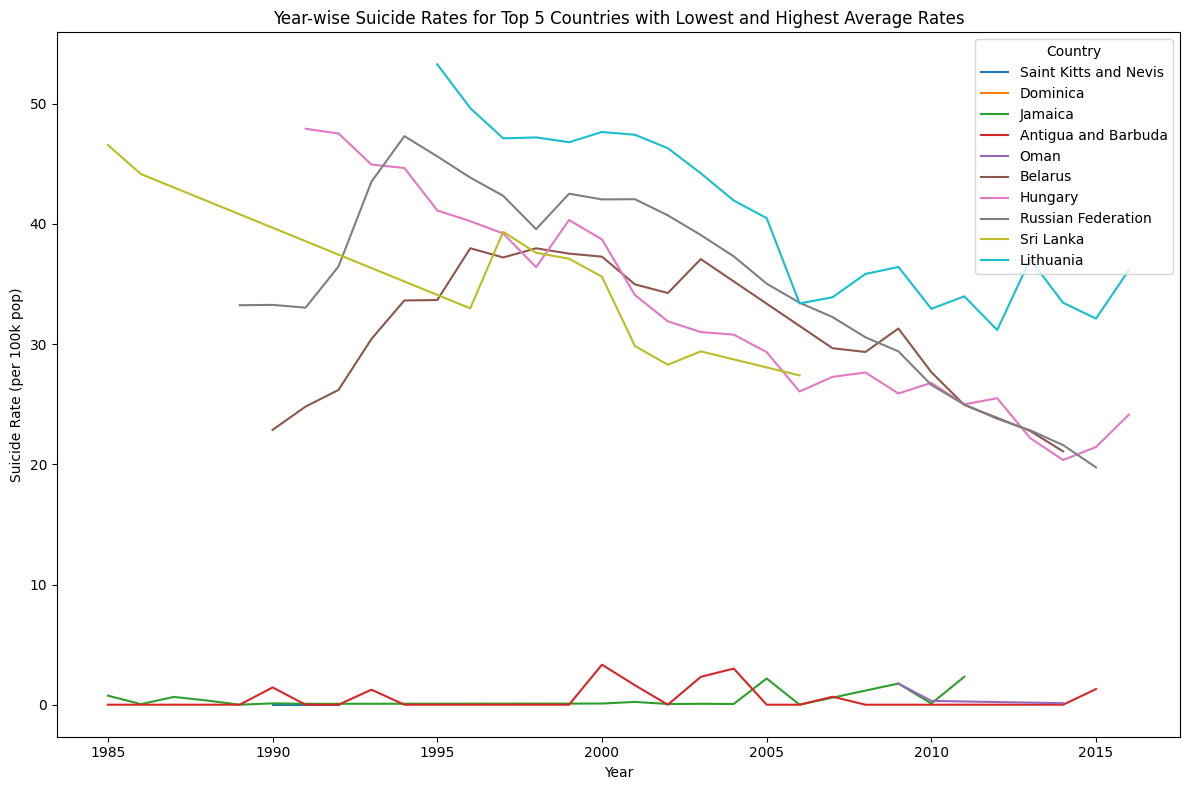

In [108]:
#So lets filter the data first:

#Group by country and year to plot graph
df = suicides.groupby(["country", "year"])["suicides/100k pop"].mean().reset_index()

#Calculate the average suicide rate across all years for each country for filtering
average_rate = df.groupby("country")["suicides/100k pop"].mean().reset_index()

#Sort the values by average suicide rate
average_rate.sort_values(by="suicides/100k pop", inplace=True)

#Select the top 5 countries with the lowest and highest average suicide rates
top_5_lowest = average_rate.head(5)
top_5_highest = average_rate.tail(5)

filter = top_5_lowest["country"].tolist() + top_5_highest["country"].tolist()

# Filter the original dataframe to include only the countries of interest
df = df[df["country"].isin(filter)]

plt.figure(figsize=(12, 8))
for country in filter:
    country_data = df[df["country"] == country]
    plt.plot(country_data["year"], country_data["suicides/100k pop"], label=country)

plt.title("Year-wise Suicide Rates for Top 5 Countries with Lowest and Highest Average Rates")
plt.xlabel("Year")
plt.ylabel("Suicide Rate (per 100k pop)")
plt.legend(title="Country", loc="upper right")
plt.tight_layout()
plt.show()


# **Q2**. Create a histogram to visualize the distribution of suicide rates. What is the most common range of suicide rates across countries? Comment on the findings about this graph.(8 Points)

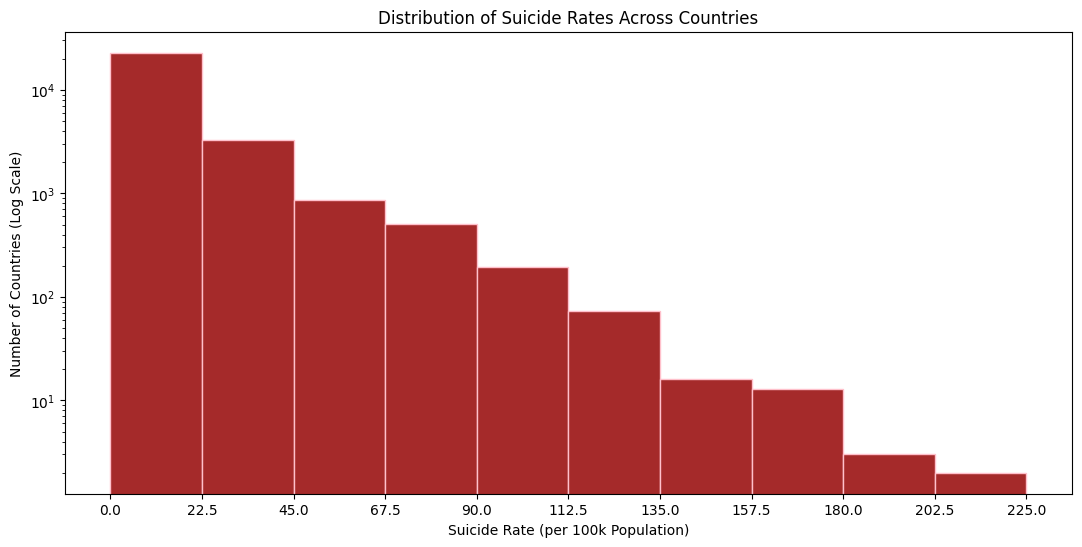

In [109]:
plt.figure(figsize=(13, 6))
counts, bins, patches = plt.hist(suicides['suicides/100k pop'], bins=10, color='brown', edgecolor='pink')
plt.title('Distribution of Suicide Rates Across Countries')
plt.xlabel('Suicide Rate (per 100k Population)')
plt.ylabel('Number of Countries (Log Scale)')
plt.yscale('log')

plt.xticks(bins)

"""
I especially chose log scale to be able to see difference between last bins where number countries not visible in normal scale.
In this log scaled table, we can see that 0-22.5 suicide-rate range is most common across all countries. 
We can say that suicide rate has an exponential relation with number of countries.
"""

plt.show()

# **Q3**. Using a pie chart , show the proportion of total suicides by gender for the most recent year available in the dataset. How do suicide rates differ between genders? Comment about your findings. (8 Points)

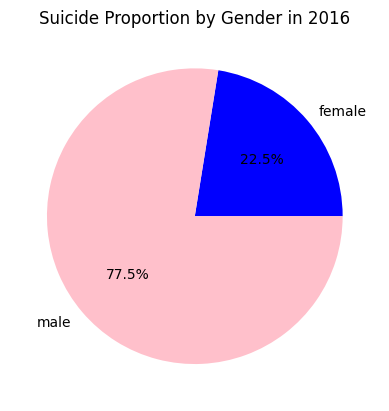

sex
female     3504
male      12099
Name: suicides_no, dtype: int64

In [110]:
year = suicides["year"].max()  #Most recent year
df = suicides[suicides["year"] == year].groupby(["sex"])["suicides_no"].sum()

plt.figure()

plt.pie(df, labels=df.index, autopct="%1.1f%%", colors=['blue', 'pink'])
plt.title(f"Suicide Proportion by Gender in {year}")
plt.show()

"""
Three out of four people who committed suicide in 2016 were men. 
However, we are most likely highlighting a correlation, not causation.
There may be indirect correlations.
"""
df

# **Q4**. Create a scatter plot showing the relationship between GDP per capita and suicide rate. Is there a correlation between a country's wealth (GDP per capita) and its suicide rates? Comment on any correlations or patterns you observe.(8 Points)

Text(0.5, 0, 'suicides/100k pop')

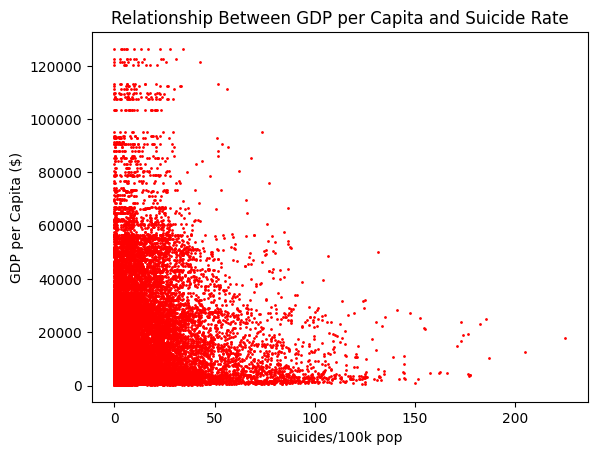

In [111]:
df = suicides.loc[:, ["gdp_per_capita ($)", "suicides/100k pop"]]
df.drop_duplicates(inplace=True)

plt.figure()
plt.scatter(y=df["gdp_per_capita ($)"], x=df["suicides/100k pop"], color="red", s=1)

"""
From this scatter plot, it’s not looking like strong correlation between GDP per capita and suicide rate per 100,000 population.
Most of the points are clustered at the lower end of the suicide rate axis, with a wide range of GDP per capita values, 
which suggests that suicide rates do not consistently increase or decrease with GDP per capita.
"""

plt.title('Relationship Between GDP per Capita and Suicide Rate')
plt.ylabel("GDP per Capita ($)")
plt.xlabel("suicides/100k pop")

# **Q5.** Using  a bar chart, illustrating the top 10 countries with the highest suicide rates. Comment about the findings from this graph. (8 Points)

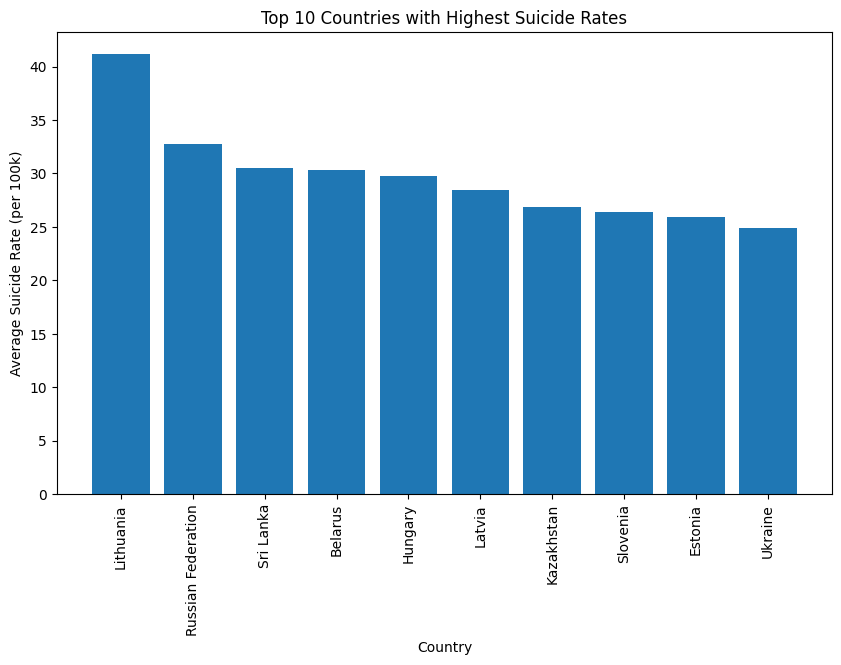

In [112]:
#Groups by country, calculates the total suicides and total population
df = suicides.groupby("country", as_index=False).agg(
    {"suicides_no": "sum", "population": "sum"}
)
#Calculates suicide per 100k for each country
df["TotalSuicideRate"] = df["suicides_no"] / df["population"] * 100000

#Sorts by TotalSuicideRate in descending order and select the top 10 countries
df = df.sort_values(by="TotalSuicideRate", ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.title("Top 10 Countries with Highest Suicide Rates")
plt.xlabel("Country")
plt.ylabel("Average Suicide Rate (per 100k)")
plt.xticks(rotation=90)
plt.bar(df["country"], df["TotalSuicideRate"])

"""
It is noteworthy that the countries with the highest suicide rates are generally from Europe and Asia.
Also we can underline fact that european countries in this bar chart are the ones with less gdp per capita.
"""

plt.show()

# SUBMIT FORMAT

* **<-zip>**
  - **studentID_name_surname_hw2.ipynb**


# PLAGIARISM

All work on assignments must be done individually. You are encouraged to discuss the given assignments with your classmates, but these discussions should be carried out in an abstract way. That is, discussions related to a particular solution to a specific probem (either in actual code or in pseudocode) will not be tolerated. In short, turning in someone else’s work (including work available on the internet), in whole or in part, as your own will be considered as a violation of academic integrity. Please note that the former conditions also hold for the material attained using AI tools, including ChatGPT, GitHub Copilot, etc.